# TODO

## right now

* test with Gaussian AR process
* Usable estimators
  * By better forward prediction? (wind prediction forward stepwise)
  * By better weighting of forward predictions also (wind variance forward also)
  * By gradient descent?
  * By creating correlated estimators?
  * by Martin-style estimators
  * Jones-style kalman filtering
  * What is happening for $p=1$?
  * is there an off-by-one error in the code causing this?
  * Sparceprocess.org book reconstruction
  * note also that the linear model weights for the first coefficient in the nonuniform case are implausibly low.
  * hack- unweight estimators?
  * Is adaptive reweighting in the wlm causing me problems? Should i be reusing weights?
* plots
  * missing `eta` from kernel plots, which worsens bias
  * clip kernel plots automatically
  * violin plots for $\hat{\eta}$, $\hat{\tau}$, and $\hat{\mu}$
  * figure captions and graph labels
  * label graph with model parameters
  * related plots should be subfigures
* Mention positivity constraint
* go through code and maths and be consistent about $\phi$ vs $\eta\phi$
* $\lambda(t)$ state-filtering motivation and linear filter convergence results
* Test influence of weighting rules
* check all sims using same parameters (esp. number of iterations, series length)


## before submission

* Citation styling
* figure sizing
* Use LASSO regularization?


## notes


Broerson notes:

> Jones (1981) has formulated the maximum likelihood estimator for irregular observations. However, Jones (1984) also found that the likelihood has several local maxima and the optimisation requires extremely good initial estimates. Broersen and Bos (2005) used the method of Jones to obtain maximum likelihood estimates for irregular data. If simulations started with the true process parameters as initial conditions, that was sometimes, but not always, good enough to converge to the global maximum of the likelihood. However, sometimes even those perfect and nonrealisable starting values were not capable of letting the likelihood converge to an acceptable model. So far, no practical maximum likelihood method for irregular data has solved all numerical problems, and certainly no satisfactory realisable initial conditions can be given. As an example, it has been verified in simulations that taking the estimated AR( p–1) model together with an additional zero for order p as starting values for AR( p) estimation does not always converge to acceptable AR( p) models. The model with the maximum value of the likelihood might not in all cases be accurate and many good models have significantly lower numerical values of the likelihood. Martin (1999) suggests that the exact likelihood is sensitive to round-off errors. Broersen and Bos (2005) calculated the likelihood as a function of true model parameters, multiplied by a constant factor. Only the likelihood for a single pole was smooth. Two poles already gave a number of sharp peaks in the likelihood, and three or more poles gave a very rough surface of the likelihood. The scene is full of local minima, and the optimisation cannot find the global minimum, unless it starts very close to it.
    
> [...]    
> Benedict et al. (2000) give an extensive survey of many techniques for irregularly sampled data. Various slotted estimates of the autocovariance function are compared using postprocessing algorithms. No serious problems are encountered if the highest frequency of interest is less than 20% of the mean data rate. Then, the resampling bias is rather small and many methods give acceptable results. Problems arise when higher frequencies are of interest.
    
* Can we escape these problems using the special qualities of the HAwkes spectrum?
* Or can we redefined the problem as predictive loss, and thus avoid the AR coefficient thing?
* Or can we select an optimal binning to get optimal bias/variance measure?
* Or do our potentially high frequencies lead to problems?
* Can we do parallel approximate randomised NNMF to extract the right decomp from large data?

  * With a robust loss?



## Abstract
We describe a linear-least-sum-of-squares-type nonparametric estimator of the influence parameters of the Hawkes point process which improves upon the state of the art by offering fast finite-sample convergence and handling data with uneven discretization and censoring.


## Introduction

We are interested in the problem of estimating the
parameters of the Hawkes process
via the simpler problem of estimating an approximating
linear autoregressive process.

The multivariate Hawkes process
(<cite data-cite="hawkes_spectra_1971">Hawkes 1971</cite>)
is a well-known model of mutual in multivariate point processes,
which has found application in epidemiology, neurology, finance and seismology,
amongst other areas.

Formal estimators of the parameters of this model are traditionally estimated
by numerical optimisation of an implicit likelihood equation
(<cite data-cite="ogata_asymptotic_1978">Ogata, 1978</cite>,
<cite data-cite="ozaki_maximum_1979">Ozaki 1979</cite>),
which has known difficulties such as

* poor computational performance, scaling as $\mathcal{O}(N^3)$
* a lack of the convenient model selection procedures
  available to linear models, e.g. the LASSO.
* no clear estimation procedure in the case of missing or censored data

One approach used to ease such difficulties in point process statistics
is to estimates the parameters of point processes through
generalised linear Poisson regression of an appropriately-weighted
discrete-time linear approximation.
That is, we estiamte the parameters of our process via a linearly interacting
Poisson regression.
This method allows access to all the tools of generalised linear model estimation,
at the cost of an  approximation error.
Recently, the Hawkes model in particular has benefited
from explicit proofs of the efficiency and convergence of estimators
based on these approximations
(<cite data-cite="eichler_graphical_2016">Eichler et al, 2016</cite>,
<cite data-cite="hansen_lasso_2015">Hansen et al, 2015.</cite>)
Specifically, Eichler et al have shown asymptotic consistency of the
linear-least squares fit based on a discretized process
as the discrete time step goes to zero.

However, Eichler et al's discretized Hawkes process results
are limited in applicability.
Firstly, they use of piecewise constant approximation to the intensity
function introduces
bias with finite step size by preferentially filtering high-frequency
components from the process's spectrum.
Secondly, they do not offer guarantees for the common case
where observations of the point process are not complete, but 
are already discretized to a finite step size.

Motivated by the need to analyze a particular data set of virality
on social media where the data is censored by network limitations,
we explore an improved version of the linear estimator of the Hawkes process parameters.
of the Berman-Turner device to a
nonuniformly discretized point process, and analyze convergence
through bootstrap simulation, and reduce estimator bias by improved
filtering.

## Hawkes model

We usually consider the process on an interval $[0,T_\text{max}]$.

We consider a point process (i.e. random counting measure) $N$.
We write $N(t)$ for $N([0,t]$, the number of events on interval $[0,t]$, and
$\mathcal{F(t)}$ for the filtration generated by $\{N(s)\}_{s\lt t}.$

The conditional intensity $\lambda$ associated with such a count process  is
$$\lambda(t)=\lim_{h\rightarrow 0}\frac{1}{h}P(N([t,t+h))\geq1|\mathcal{F}(t)).$$

Then the Hawkes process is an inhomogenous Poisson process
with 

$$\lambda(t)=\mu+\int_{-\infty}^t\phi(u)dN(t-u).$$

Here $\mu$ is a positive constant background rate, and
$\phi$ is a non-negative influence function with strictly
positive support.

We assume 
$$||\phi||<1$$ in order that the process has
a well-defined stationary distribution.

Of particular interest is the possibility of estimating $\phi$ nonparametrically.


## Generalized linear regression of point process intensities

Approximation regression for point processes using a Generalized Linear Model (GLM)
appoximation is common in point process analysis, where it is known as the Berman-Turner Device
(<cite data-cite="berman_approximating_1992">Berman and Turner 1992</cite>, <cite data-cite="baddeley_practical_2000">Baddeley and Turner 2000</cite>.)

We extend the method of <cite data-cite="eichler_graphical_2016">(Eichler et al, 2016</cite>,
<cite data-cite="hansen_lasso_2015">Hansen et al, 2015)</cite>.

### Discrete approximation of the process

The GLM linear approximation method requires us to choose
a sequence of design points, $\mathbf{T}:=(T_1,T_2,\dots, t_K)$
such that $$0\leq t_1 \lt t_2 \lt\dots\lt t_K \leq T_\text{max}$$

$$Y_{\mathbf{T}}(k):=N(T_k)-N(T_{k-1})$$

Of particular interst is the special case, $\mathbf{T}=(0,h,2h,\dots,Kh)$ for some $h>0$.
For this special form, we will abuse notation and write $Y_{h}(k)$ for the associated discretization.

For $h$ small enough, the $Y_{h}(k)$ will become approximately binary variables, with the probability that more than one jump takes place in an interval of order $\mathcal{o}(h)$.
This allows us to approximate the conditional mean by
$$
\begin{aligned}
E[y_h(k)|\mathcal{F}_kh]&=P(N((k+1)h)-N(kh)=1|\mathcal{kh}+\mathcal{o}(h)\\
&=h\mu + h\int_0^\infty\phi(s)dN(kh-1) +\mathcal{o}(h)\\
&=h\mu + h\sum_{j=1}^\infty\int_0^\infty\phi(jh+\alpha)dN(k(h-j)-\alpha) +\mathcal{o}(h)\\
\end{aligned}
$$



### Discrete approximation of the influence function
We assume the influence function is continuous;
Then we can approximate it by a piecewise-constant function.
To get a simple forumlation, we can choose pieces of length $h$, such that $\phi(t)\approx\phi(h\lfloor t/h\rfloor)=:\phi_h(h\lfloor t/h\rfloor)$, and
$$E[Y_h(k)|\mathcal{F}_h{k-1}]\approx h\mu+h\sum_{j=1}^\infty\phi_h(jh)Y_h(k-j)$$
This is suggestive of a standard $AR(\infty)$ problem, notwithstanding
that we know the residuals of such a linear predictor cannot be Gaussian, since the process by construction takes on only integer values.


We define $Y_h^\ell(k)=(Y_h(k-1),\dots,Y_h(k-\ell))$ and $\phi_h^\ell=h(\phi(h), \phi(2h),\dots,\phi(h\ell) )$

The squared residuals are then

$$
\sum_{k=\ell+1}^K\|Y_h(k)-\mu h-h\phi_h^\ell Y_h^\ell(k)\|_2^2
$$
and we may find an estimate for the $\mu$ and $\phi_h$ parameters with the usual techniques. 


## Convergence

Standard linear system identification theory for AR(p) processes (e.g. <cite data-cite="ljung_system_1999">Ljung, 1999</cite>) offer only asymptotic large-sample guarantees, and these results are predicated upon observing a sample from the series in a stationary regime.

There are a small number of results giving estimation risk bounds for finite samples
(e.g. <cite data-cite="mcdonald_risk_2011">McDonald, 2011</cite>,
<cite data-cite="reynaud-bouret_adaptive_2003">Reynaud-Bouret, 2003</cite>)
or away from stationarity
(<cite data-cite="reynaud-bouret_non_2007">Reynaud-Bouret and Roy 2007</cite>)
but these are predicated upon time series with given structures,
or mixing characterisations difficult to test in an unknown system.

Since our estimator only approximates these such bounds in any case, hypoethetical learning bounds on the AR(p) tell us little about the actual convergence properties of our estimates.

Thus, we estimate convergence in the finite sample regime using simulation-based methods.



### Extensions: non-constant intensity filtering.

TODO: construct the previous estimator as a special case of this general one, rahter than in this backwards order.


More generally, we might observe that the simple form for our predictor is due to the quantisation of the $\phi$, not of the process. That is


$$\begin{aligned}
E[N(t+h)-N(t)|\mathcal{F}_t] &\approx h\mu+h\phi*N\\
&=h\mu+h\sum_{j=1}^\infty\int_{jh}^{(j+1)h}\phi_h(t-s)dN(s)\\
&=h\mu+h\sum_{j=1}^\infty\phi_h(jh)\int_{jh}^{(j+1)h}dN(s)\\
&=\dots\\
&= h\mu+h\sum_{j=1}^\infty\phi_h(jh)\int_{jh}^{(j+1)h}\lambda(s)ds\\
&=\dots\\
&\approx h\mu+h\sum_{j=1}^\infty\phi_h(jh)\int_{jh}^{(j+1)h}\hat{\lambda}(s)ds
\end{aligned}$$

TODO: improve last line; mention filtering/linear projection interpretation.


TODO Use notation from Eichler appendix Lemmas A.1, A.2.



Spectral characterisation of Hawkes processes 
(<cite data-cite="hawkes_spectra_1971">Hawkes, 1971</cite>),
(<cite data-cite="van_lieshout_estimation_2011">van Lieshout, 2011</cite>),
(<cite data-cite="jovanovic_cumulants_2015">Jovanovic, 2015</cite>).
(<cite data-cite="dahlhaus_empirical_2009">Dahlhaus and Poolonik 2009</cite>),
(<cite data-cite="bacry_second_2014">Bacry and Muzy, 2014</cite>),
(<cite data-cite="bremaud_power_2002">Brémaud, P. and Massoulié, 2002</cite>).


Monotone cubic interpolation 
(<cite data-cite="fritsch_monotone_1980">Fritsch and Carlson, 1980</cite>),
Full iterative spectral reconstruction as per 
(<cite data-cite="marvasti_recovery_1991">Marvasti et al 1991</cite>),
or the time varying coefficient method
(<cite data-cite="martin_autoregression_1999">Martin 1999</cite>).


Overbeck's branching representation <cite data-cite="overbeck_estimation_1998">Overbeck 1998</cite>.

$$dY(t)=2\sqrt{Y(t)}dW(t)+\left(b+\frac{a}{Y(t)}\right)Y(t)dt.$$

Martin's general continuous diffusion representation <cite data-cite="martin_autoregression_1999">Martin 1999</cite>.

\begin{align*}
\{L(Y(t))\}dt&=dW(t),\\
L&:=\sum_{j=0}^p b_j\left(\frac{d}{dt}\right)^{p-1},\\
b_0&=0\\
&\Rightarrow\\
Y(t)&=\int_{-infty}^{\infty} G(t-s)dW(s)
\end{align*}

where $$LG(t)=\delta(t)$$ 

In [1]:
import numpy as np
from importlib import reload
from scipy.stats import poisson, geom, expon
import pandas as pd
# plotting requirements
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt, log, pi
%matplotlib inline
#Large graphs by defaultapproximation
mpl.rcParams['figure.figsize'] = (10.0, 8.0)
% config InlineBackend.figure_format = 'svg'

In [2]:
import numpy.random
numpy.random.seed(1238)

In [3]:
from hawkes_process import influence_cts
influence_cts = reload(influence_cts)

tau = 5.0
exp_phi = influence_cts.ExpKernel(tau)
causal_phi = influence_cts.MaxwellKernel(tau)
mu=9.0
eta=0.9
start=0.0
end=300

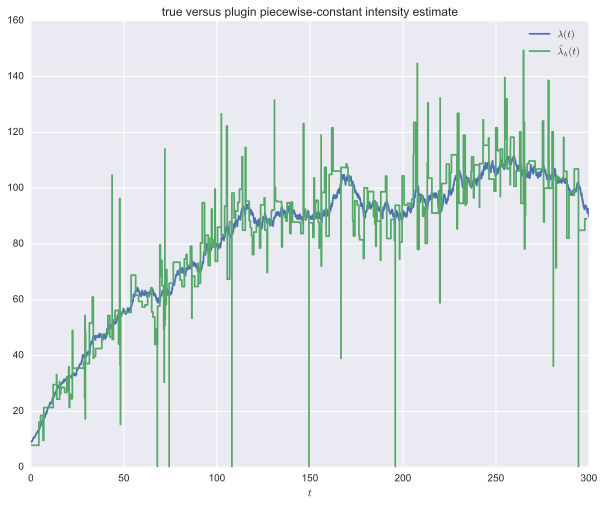

In [4]:
from hawkes_process import sim_nonlattice
from hawkes_process import sim_cts
from hawkes_process import convert
from hawkes_process import plots
sim_nonlattice = reload(sim_nonlattice)
convert = reload(convert)
plots = reload(plots)
sim_cts = reload(sim_cts)

import numpy.random
numpy.random.seed(1238)

timestamps = np.sort(sim_cts.sim_hawkes(phi=exp_phi, mu=mu, eta=eta, start=start, end=end));
evalpts = np.linspace(start, end, 5000)

true_intensity = sim_cts.intensity_hawkes(timestamps, phi=exp_phi, mu=mu, eta=eta, eval_timestamps=evalpts)
plt.plot(evalpts, true_intensity, label="$\lambda(t)$")

# eq_obs_times, eq_cum_counts = sim_nonlattice.quantize_timestamps(timestamps)
# eq_obs_times, eq_rates = convert.cumulative_counts_as_rates(eq_obs_times, eq_cum_counts)
# plots.piecewise(eq_obs_times, eq_rates, label="evenly sampled");

obs_t, cum_obs = sim_nonlattice.quantize_timestamps(timestamps, obs_t='poisson')
obs_t, rates = convert.cumulative_counts_as_rates(obs_t, cum_obs);
plots.piecewise(obs_t, rates, label="$\hat{\lambda}_h(t)$");

plt.gca().set_ylim(bottom=0, top=None)
plt.gca().set_xlim(left=start, right=end);
plt.legend()
plt.xlabel('$t$')
plt.title("true versus plugin piecewise-constant intensity estimate");

In [7]:
import numpy.random
from hawkes_process import sim_nonlattice
from hawkes_process import sim_cts
from hawkes_process import convert
from hawkes_process import plots
from hawkes_process import fit_nonlattice
fit_nonlattice = reload(fit_nonlattice)
sim_nonlattice = reload(sim_nonlattice)
convert = reload(convert)
plots = reload(plots)
sim_cts = reload(sim_cts)

def fit_and_plot(
        model,
        mu=mu,
        eta=eta,
        phi=exp_phi,
        start=start,
        end=end,
        max_iter=0,
        basis_lag=1.0,
        penalty_weight='adaptive',
        sample_weight='bermanturner',
        max_basis_span=80,
        extra_label="",
        seed=1238, 
        **fit_kwargs):
    numpy.random.seed(seed)

    timestamps = np.sort(sim_cts.sim_hawkes(phi=phi, mu=mu, eta=eta, start=start, end=end));
    evalpts = np.linspace(start, end, 5000)
    true_intensity = sim_cts.intensity_hawkes(timestamps, phi=phi, mu=mu, eta=eta, eval_timestamps=evalpts)
    plt.plot(evalpts, true_intensity, label="$\lambda(t)$")

    obs_t, cum_obs = sim_nonlattice.quantize_timestamps(timestamps, obs_t='poisson')
    obs_t, rates = convert.cumulative_counts_as_rates(obs_t, cum_obs);
    plots.piecewise(obs_t, rates, label="$\hat{\lambda}_h(t)$");

    model.fit(obs_t, cum_obs,
        max_basis_span=max_basis_span,
        basis_lag=basis_lag,
        penalty_weight=penalty_weight,
        sample_weight=sample_weight,
        **fit_kwargs
    )
    phi_evalpts = np.linspace(0, 30, 300)
    plt.plot(evalpts, true_intensity, label='$\lambda(t)$');
    plots.piecewise(
        obs_t, model.predict(obs_t),
        label='$\hat{\lambda}_\mathbf{T}(t|\mathcal{F}_t)$');
    plt.legend()
    plt.xlabel('$t$')
    plt.title(
        "true versus discretized intensity estimates {}".format(
            extra_label
        )
    );

    plt.figure();
    plt.plot(phi_evalpts, phi(phi_evalpts), label='$\phi(t)$');
    plots.phi_hat_plot(model, label='$\hat{\phi}_h(t)$');
    plt.legend()
    plt.xlabel('$t$')
    plt.title(
        "true versus discretized influence function estimates {}".format(
            extra_label
        )
    );



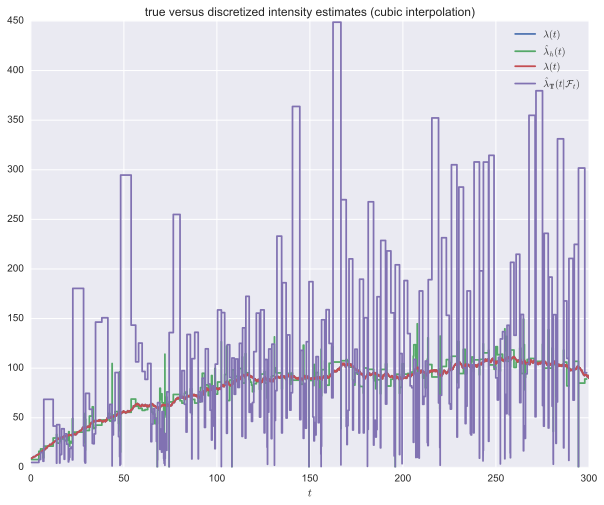

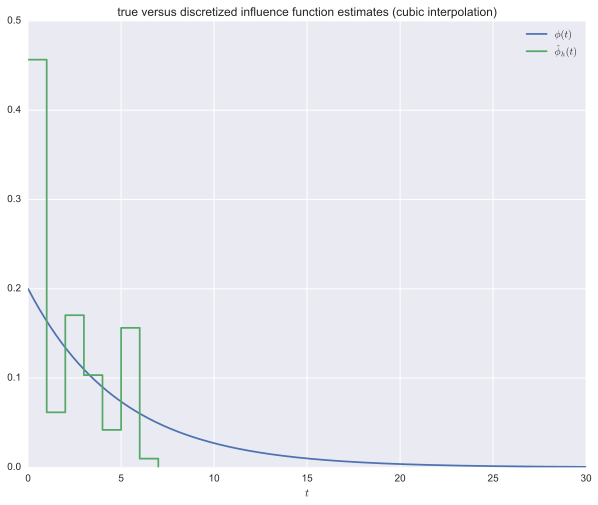

In [8]:
# inference of cubic interpolated estimates

from hawkes_process import fit_nonlattice
fit_nonlattice = reload(fit_nonlattice)

model = fit_nonlattice.NonLatticeOneShot(
    fit_intercept=True,
    wlm_factory='WeightedLassoLarsCV',
    cum_interp='cubic'
)

model.fit(obs_t, cum_obs, penalty_weight='adaptive')
fit_and_plot(model, phi=exp_phi, extra_label='(cubic interpolation)')

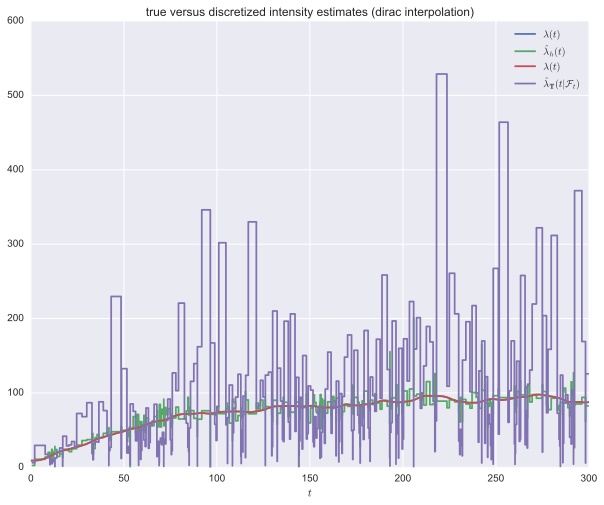

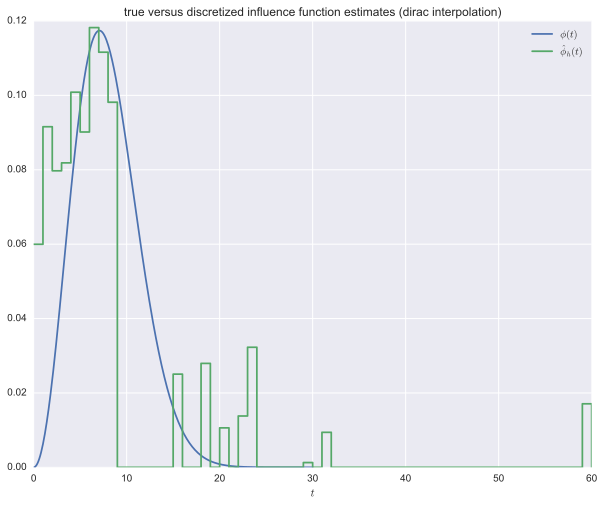

In [17]:
# inference of iterative interpolated estimates

from hawkes_process import fit_nonlattice
fit_nonlattice = reload(fit_nonlattice)

model = fit_nonlattice.NonLatticeOneShot(step_size=0.0625, cum_interp='dirac', strategy='random')

fit_and_plot(model, phi=causal_phi, extra_label='(dirac interpolation)')


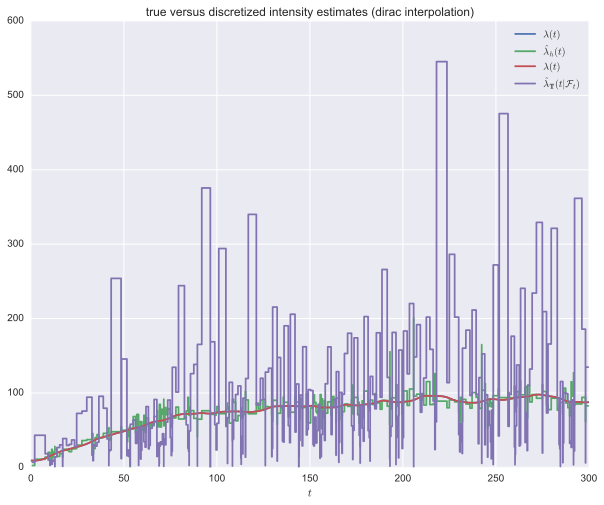

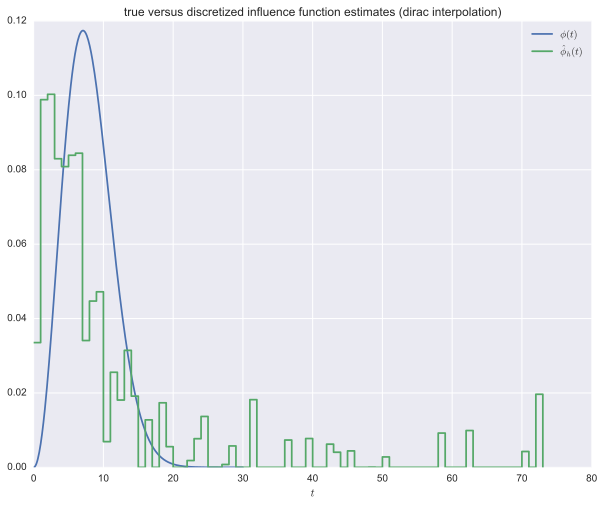

In [20]:
# inference of interpolated estimates

from hawkes_process import fit_nonlattice
fit_nonlattice = reload(fit_nonlattice)

model = fit_nonlattice.NonLatticeOneShot(step_size=0.0625, cum_interp='dirac', strategy='spike')

fit_and_plot(model, phi=causal_phi, extra_label='(dirac interpolation)')


i 0 3
i 1 3
i 2 3


ValueError: A value in x_new is below the interpolation range.

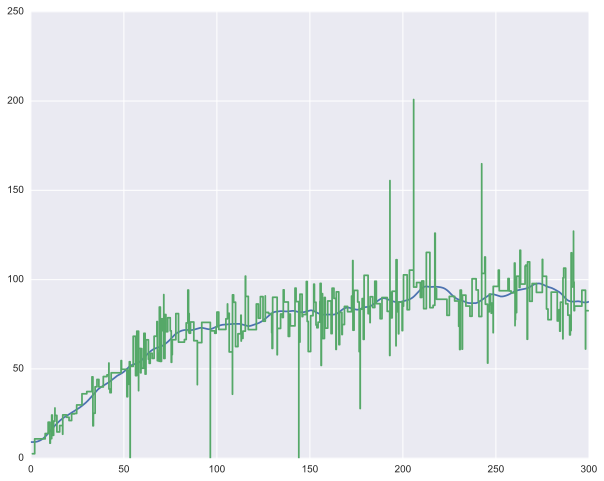

In [27]:
# inference of iterative interpolated estimates

from hawkes_process import fit_nonlattice
fit_nonlattice = reload(fit_nonlattice)

model = fit_nonlattice.NonLatticeOneShot(step_size=0.0625)

fit_and_plot(model, phi=causal_phi, extra_label='(iterative interpolation)')


## Simulations


In [12]:
# linear versus cubic, uniform
numpy.random.seed(1238)
from hawkes_process import sim_cts
from hawkes_process import plots
from hawkes_process import estimator_eval
sim_nonlattice = reload(sim_nonlattice)
estimator_eval = reload(estimator_eval)
plots = reload(plots)

model_linear = fit_nonlattice.NonLatticeOneShot(
    cum_interp='linear',
    wlm_factory='WeightedLassoLarsCV',
)

model_cubic = fit_nonlattice.NonLatticeOneShot(
    cum_interp='cubic',
    wlm_factory='WeightedLassoLarsCV',
)

res = estimator_eval.fits_compare(
    model_linear, model_cubic,
    n_iter=100,
    mu=9.0,
    start=0.0,
    end=600,
    basis_lag=2.0,
    rate_1=1.0,
    eta=0.9,
    max_basis_span=40,
)


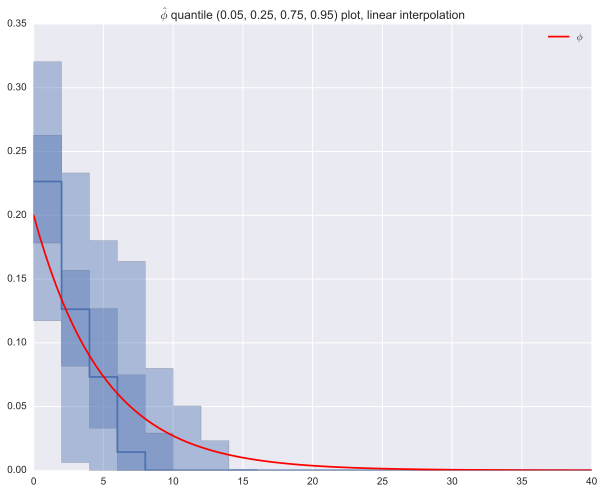

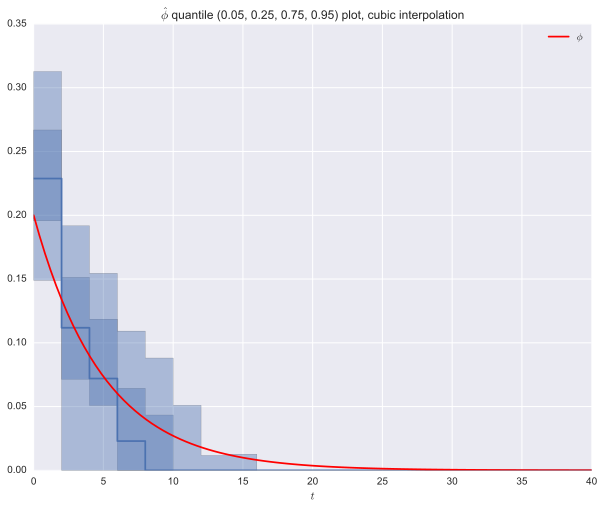

In [13]:
plots = reload(plots)
plots.phi_var_plot(
    res['fits_1']['coef'],
    phi=exp_phi,
    basis_lag=res['basis_lag'],
);
plt.legend()
plt.title("$\hat{\phi}$ quantile (0.05, 0.25, 0.75, 0.95) plot, linear interpolation");
plt.figure()
plots.phi_var_plot(
    res['fits_2']['coef'],
    phi=exp_phi,
    basis_lag=res['basis_lag'], );
plt.legend()
plt.xlabel('$t$')
plt.title("$\hat{\phi}$ quantile (0.05, 0.25, 0.75, 0.95) plot, cubic interpolation");


/home/nfs/z3420853/Virtualenvs/basic34/lib/python3.4/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 87 iterations, alpha=1.213e-02, previous alpha=1.105e-02, with an active set of 58 regressors.
  ConvergenceWarning)


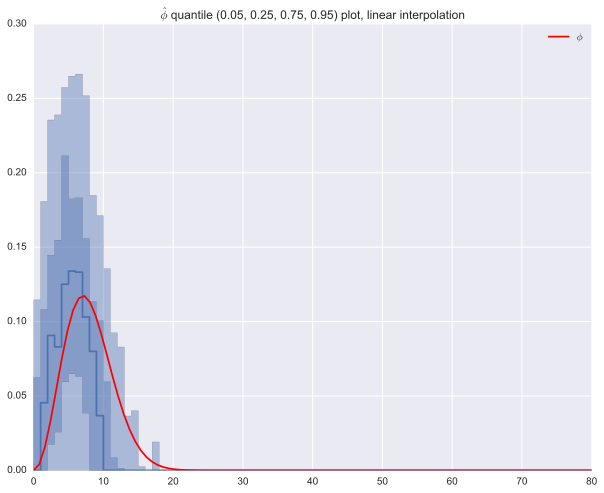

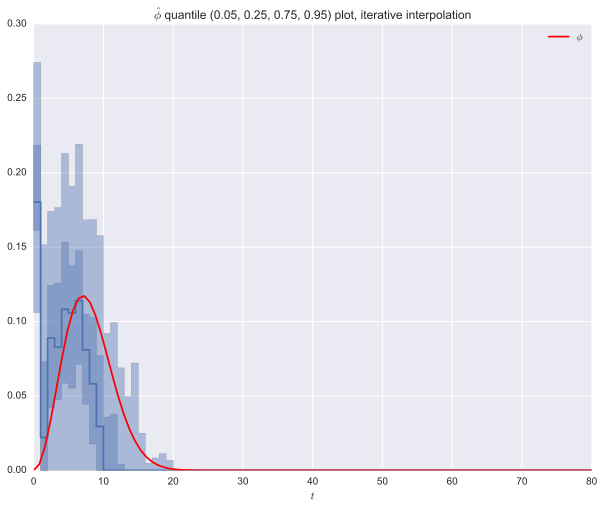

In [11]:
# "more causal" kernel - maxwell boltzman dist
from hawkes_process import fit_nonlattice
from hawkes_process import estimator_eval
fit_nonlattice = reload(fit_nonlattice)
estimator_eval = reload(estimator_eval)

model_linear = fit_nonlattice.NonLatticeOneShot(
    cum_interp='linear',
    wlm_factory='WeightedLassoLarsCV',
)
model_adaptive = fit_nonlattice.NonLatticeOneShot(
    step_size=0.0625,
    wlm_factory='WeightedLassoLarsCV',
)

res = estimator_eval.fits_compare(
    model_linear, model_adaptive,
    n_iter=100,
    mu=9.0,
    phi=causal_phi,
    start=0.0,
    end=1200,
    basis_lag=1.0,
    rate_1=1.0,
    obs_times_1='poisson',
    eta=0.9,
    max_basis_span=80,
)
plots = reload(plots)
plots.phi_var_plot(
    res['fits_1']['coef'],
    phi=causal_phi,
    basis_lag=res['basis_lag']);
plt.legend();
plt.title("$\hat{\phi}$ quantile (0.05, 0.25, 0.75, 0.95) plot, linear interpolation");

plt.figure()
plots.phi_var_plot(
    res['fits_2']['coef'],
    phi=causal_phi,
    basis_lag=res['basis_lag'], );
plt.legend()
plt.xlabel('$t$')
plt.title("$\hat{\phi}$ quantile (0.05, 0.25, 0.75, 0.95) plot, iterative interpolation");



/home/nfs/z3420853/Virtualenvs/basic34/lib/python3.4/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 83 iterations, alpha=1.176e-02, previous alpha=1.099e-02, with an active set of 56 regressors.
  ConvergenceWarning)


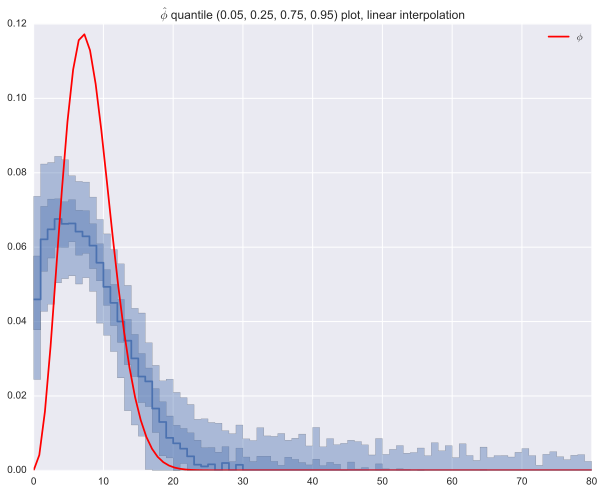

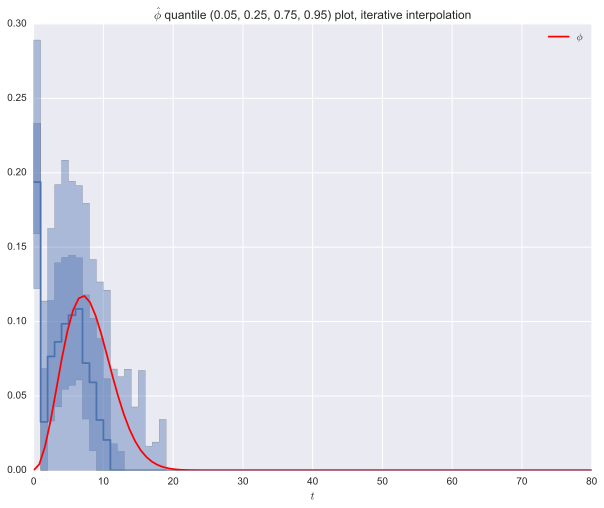

In [13]:
# "more causal" kernel - maxwell boltzman dist, iterative or not
from hawkes_process import fit_nonlattice
from hawkes_process import estimator_eval
fit_nonlattice = reload(fit_nonlattice)
estimator_eval = reload(estimator_eval)

model_linear = fit_nonlattice.NonLatticeOneShot(
    cum_interp='dirac',
    strategy='random',
    wlm_factory='WeightedLassoLarsCV',
)
model_adaptive = fit_nonlattice.NonLatticeOneShot(
    step_size=0.0625,
    wlm_factory='WeightedLassoLarsCV',
)

res = estimator_eval.fits_compare(
    model_linear, model_adaptive,
    n_iter=100,
    mu=9.0,
    phi=causal_phi,
    start=0.0,
    end=1200,
    basis_lag=1.0,
    rate_1=1.0,
    obs_times_1='poisson',
    eta=0.9,
    max_basis_span=80,
)
plots = reload(plots)
plots.phi_var_plot(
    res['fits_1']['coef'],
    phi=causal_phi,
    basis_lag=res['basis_lag']);
plt.legend();
plt.title("$\hat{\phi}$ quantile (0.05, 0.25, 0.75, 0.95) plot, linear interpolation");

plt.figure()
plots.phi_var_plot(
    res['fits_2']['coef'],
    phi=causal_phi,
    basis_lag=res['basis_lag'], );
plt.legend()
plt.xlabel('$t$')
plt.title("$\hat{\phi}$ quantile (0.05, 0.25, 0.75, 0.95) plot, iterative interpolation");



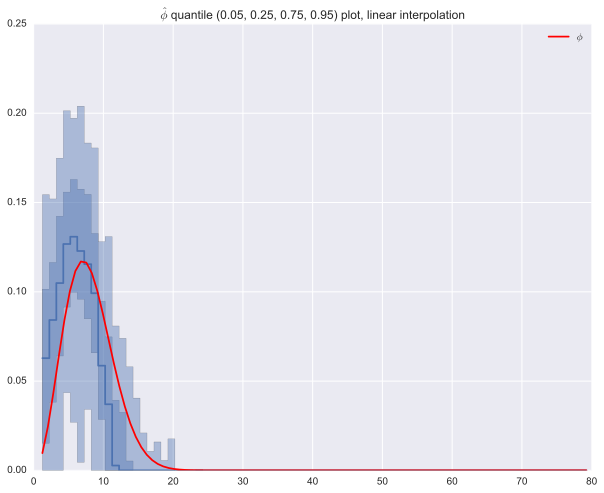

In [21]:
# "more causal" kernel - truncated basis (plus also LARS)

from hawkes_process import fit_nonlattice
from hawkes_process import estimator_eval
fit_nonlattice = reload(fit_nonlattice)
estimator_eval = reload(estimator_eval)

trunc_basis_lag = np.arange(1,80) + 0.25

model_adaptive = fit_nonlattice.NonLatticeOneShot(
    step_size=0.0625,
    wlm_factory='WeightedLassoCV',
    max_iter=2000,  # glm iterations
    selection='random',  #glm coordinate descent
    
)

res = estimator_eval.fits_compare(
    model_adaptive,
    n_iter=100,
    mu=9.0,
    phi=causal_phi,
    start=0.0,
    end=3000,
    basis_lag=trunc_basis_lag,
    rate_1=1.0,
    obs_times_1='poisson',
    eta=0.9,
    max_basis_span=80,
)
plots = reload(plots)
plots.phi_var_plot(
    res['fits_1']['coef'],
    phi=causal_phi,
    basis_lag=res['basis_lag']);
plt.legend();
plt.title("$\hat{\phi}$ quantile (0.05, 0.25, 0.75, 0.95) plot, linear interpolation");


In [16]:
import pdb; pdb.pm()


NameError: name 'pdm' is not defined


## Plotted results

Intuitively, the longer the kernel (and the bigger $\tau$) the closer we expect the discretised model to be to the continuous time model, and the closer we hope our estimates to converge.

Therefore we also vary $\tau$, choosing a true value of $\tau\in\{1,5,40\}$.

For ease of visual comparison, I plot the *ratio* of estimated to true value.

### $\hat{\mu}$, background rate estimate



### Multivariate case

In the multivariate case, we take $\mu$ to be a vector of
constants and $\phi$ to be a matrix of non-negative
link functions, $(\phi_{ij})$.